# Testing and Sanity Checking

## Testing

Generation of random values.

source: https://docs.scipy.org/doc/scipy-1.6.2/reference/tutorial/stats.html#common-methods

### Normal distribution

source: https://docs.scipy.org/doc/scipy-1.6.2/reference/generated/scipy.stats.norm.html#scipy.stats.norm

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# calculate a first moments
mean, var, skew, kurt = norm.stats(moments='mvsk')
print(mean, var, skew, kurt)

0.0 1.0 0.0 0.0


[-2.32634787  0.          2.32634787]


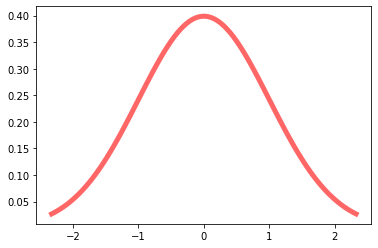

In [3]:
# display the probability density function (pdf)
vals = norm.ppf([0.01, 0.5, 0.99])
print(vals)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

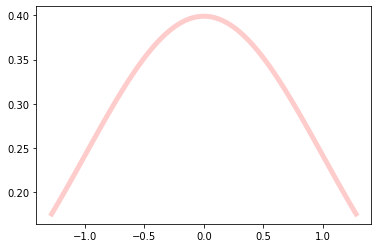

In [4]:
x = np.linspace(norm.ppf(0.1), norm.ppf(0.9), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.2, label='norm pdf')

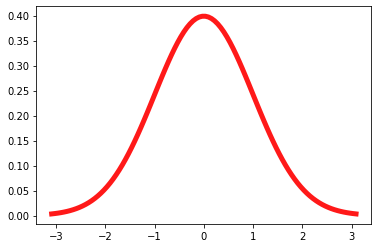

In [5]:
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.9, label='norm pdf')

In [6]:
# alternatively: freeze the distribution and display the frozen pdf
rv = norm()
print(rv)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.show()

In [7]:
# check accuracy of cdf and ppf
vals = norm.ppf([0.001, 0.5, 0.999])
print(vals)
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

[-3.09023231  0.          3.09023231]


True

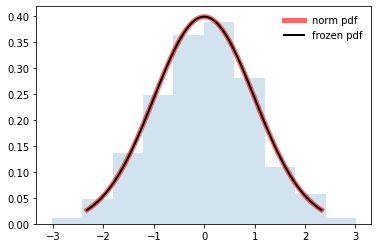

In [8]:
# generate random numbers
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
print(rv)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = norm.rvs(size=1000)
#print(r)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
#plt.show()

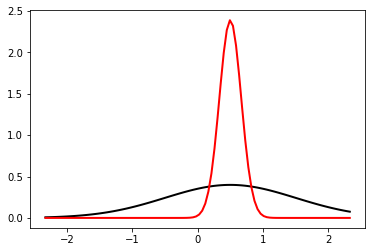

In [9]:
fig, ax = plt.subplots(1, 1)

# black
rv = norm(loc=0.5,scale=1)
print(rv)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# red
rv = norm(loc=0.5,scale=0.167)
print(rv)
ax.plot(x, rv.pdf(x), 'r-', lw=2, label='frozen pdf')

(array([0.18134955, 0.46161704, 1.51674172, 2.53889374, 3.65996371,
        3.82482694, 2.654298  , 1.08809732, 0.46161704, 0.09891794]),
 array([0.19893376, 0.2595901 , 0.32024643, 0.38090277, 0.44155911,
        0.50221545, 0.56287179, 0.62352813, 0.68418447, 0.74484081,
        0.80549715]),
 [<matplotlib.patches.Polygon at 0x7f1f3fd6c550>])

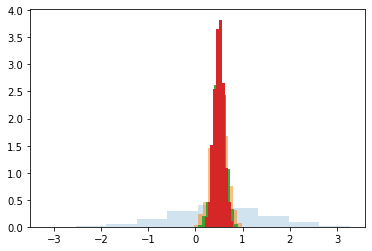

In [10]:
fig, ax = plt.subplots(1, 1)
r = norm.rvs(loc=0.5,scale=1, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

r = norm.rvs(loc=0.5,scale=0.167, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5)

r = norm.rvs(loc=0.5,scale=0.125, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.9)

r = norm.rvs(loc=0.5,scale=0.1, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=1)

In [11]:
print(type(r), len(r), r[0:3])

<class 'numpy.ndarray'> 1000 [0.42331439 0.60048587 0.55919891]


In [12]:
norm.rvs(loc=0, scale=1, size=1, random_state=None)

array([-2.26162937])

In [13]:
# interval: Endpoints of the range that contains alpha percent of the distribution (0,1)
alpha = 0.95
norm.interval(alpha, loc=0.5, scale=1)

(-1.459963984540054, 2.459963984540054)

(array([0.00492617, 0.02376153, 0.07852895, 0.22776293, 0.38800835,
        0.37236051, 0.21240487, 0.08548354, 0.0240513 , 0.00260797]),
 array([-3.01461836, -2.31034149, -1.60606461, -0.90178773, -0.19751085,
         0.50676603,  1.2110429 ,  1.91531978,  2.61959666,  3.32387354,
         4.02815042]),
 [<matplotlib.patches.Polygon at 0x7f1f3fd322e0>])

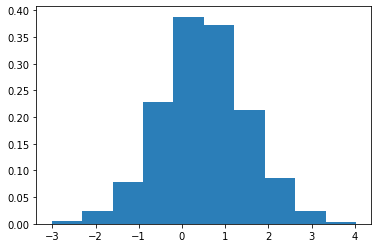

In [14]:
fig, ax = plt.subplots(1, 1)
r = norm.rvs(loc=0.5,scale=1, size=4900)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.95)

In [15]:
norm.mean(loc=0.5, scale=1)

0.5

In [16]:
norm.std(loc=0, scale=3)

3.0

In [17]:
# I want an interval [0,1], mean = 0.5, sd = ?
# interval: Endpoints of the range that contains alpha percent of the distribution (0,1)
alpha = 0.997
norm.interval(alpha, loc=0.5, scale=0.167)

(0.004387766467922161, 0.9956122335320758)

### Skewed normal distribution

source: https://docs.scipy.org/doc/scipy-1.6.2/reference/generated/scipy.stats.skewnorm.html?highlight=skewed%20normal%20distributions

In [18]:
from scipy.stats import skewnorm

In [19]:
# calculate a few first moments
# skewnorm takes a real number as a skewness parameter (alpha or shape, a>0 right-skewed)
# When a = 0 the distribution is identical to a normal distribution (norm). 
a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
print(mean, var, skew, kurt)

0.7740617226446519 0.40082844953639396 0.7844267553823128 0.6327847548211796


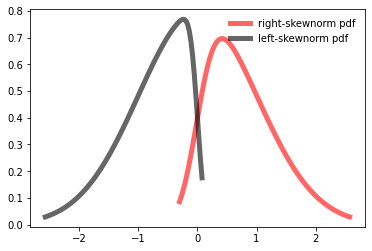

In [20]:
# display the probability density function (pdf)
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='right-skewnorm pdf')

a = -10
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'k-', lw=5, alpha=0.6, label='left-skewnorm pdf')
ax.legend(loc='best', frameon=False)

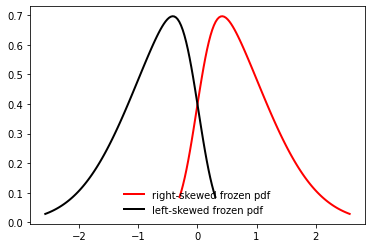

In [21]:
# alternatively: freeze the distribution and display the frozen pdf
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a)
ax.plot(x, rv.pdf(x), 'r-', lw=2, label='right-skewed frozen pdf')

a = -4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='left-skewed frozen pdf')
ax.legend(loc='best', frameon=False)

In [22]:
# check accuracy of cdf and ppf
vals = skewnorm.ppf([0.001, 0.5, 0.999], a)
print(vals)
np.allclose([0.001, 0.5, 0.999], skewnorm.cdf(vals, a))
True

[-3.29052673 -0.67423548  0.53088659]


True

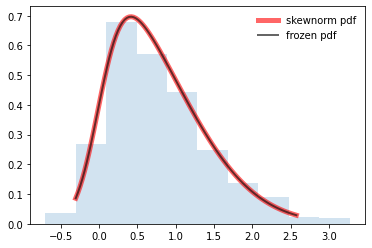

In [23]:
# generate random numbers
fig, ax = plt.subplots(1, 1)

a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

rv = skewnorm(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, alpha=0.6, label='frozen pdf')

r = skewnorm.rvs(a, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [24]:
a = -4
skewnorm.mean(a, loc=0.875, scale=1)

0.1009382773553481

In [25]:
skewnorm.std(a, loc=0.875, scale=1)

0.6331101401307627

In [26]:
# I want an interval [0,1], mean = 0.5, sd = ?
# interval: Endpoints of the range that contains alpha percent of the distribution (0,1)
alpha = 0.997
skewnorm.interval(alpha, a, loc=0.875, scale=0.09)

(0.5892784825290431, 0.9195868561402828)

## Sanity checking of s-data
### s-data v1

In [27]:
import pandas as pd

In [28]:
# display the distributions of s-data v1
in_file = '../../out/exp1_random_sdata.csv'
sdata = pd.read_csv(in_file)
print(sdata.shape)
sdata.head()

(5000, 4)


,Patient_number,S,M,P
0,1,0,1,0.5273
1,2,0,1,0.9369
2,3,0,1,1.3223
3,4,0,1,1.2969
4,5,0,1,0.3182


Number of patients: 5000, min: 0.0002, max: 4.5797


(array([7.00949885e-01, 5.83906540e-01, 4.12708811e-01, 2.69025003e-01,
        1.28398297e-01, 5.93951305e-02, 1.83426138e-02, 7.86112021e-03,
        2.62037340e-03, 4.36728901e-04]),
 array([2.00000e-04, 4.58150e-01, 9.16100e-01, 1.37405e+00, 1.83200e+00,
        2.28995e+00, 2.74790e+00, 3.20585e+00, 3.66380e+00, 4.12175e+00,
        4.57970e+00]),
 [<matplotlib.patches.Polygon at 0x7f1f3e11c460>])

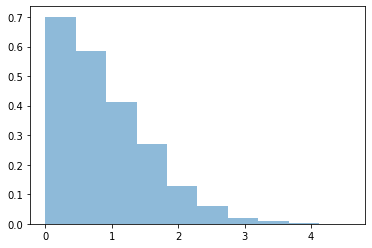

In [29]:
# plot histogram of PGE2 level values for all patients (5000)
fig, ax = plt.subplots(1, 1)

x = np.array(sdata.P)
print('Number of patients: {}, min: {}, max: {}'.format(len(x),min(x), max(x)))
ax.hist(x, density=True, histtype='stepfilled', alpha=0.5)

The number of not severe patients is 4900, and severe patients is 100
Number of patients: 4900, min: 0.0002, max: 4.5797
Number of patients: 100, min: 0.025, max: 3.2063


(array([0.53437274, 0.50293905, 0.50293905, 0.25146953, 0.47150536,
        0.31433691, 0.09430107, 0.25146953, 0.09430107, 0.12573476]),
 array([0.025  , 0.34313, 0.66126, 0.97939, 1.29752, 1.61565, 1.93378,
        2.25191, 2.57004, 2.88817, 3.2063 ]),
 [<matplotlib.patches.Polygon at 0x7f1f3fb7a220>])

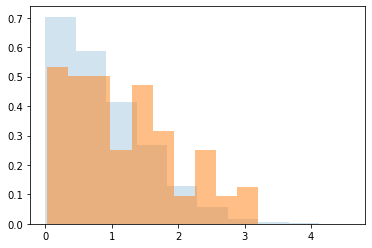

In [30]:
# plot histogram of PGE2 level values separately for 4900 not severe patients (S=0) and 100 severe (S=1) patients
fig, ax = plt.subplots(1, 1)

not_severe_l = list()
severe_l = list()
data = sdata.copy()
for idx, row in data.iterrows():
    S = int(row.S)
    P = row.P
    if S == 0:
        not_severe_l.append(P)
    else:
        severe_l.append(P)
        
print('The number of not severe patients is {}, and severe patients is {}'.format(len(not_severe_l), len(severe_l)))

# plot not severe histogram
x_not_severe = np.array(not_severe_l)
print('Number of patients: {}, min: {}, max: {}'.format(len(x_not_severe),min(x_not_severe), max(x_not_severe)))
ax.hist(x_not_severe, density=True, histtype='stepfilled', alpha=0.2)

# plot severe histogram
x_severe = np.array(severe_l)
print('Number of patients: {}, min: {}, max: {}'.format(len(x_severe),min(x_severe), max(x_severe)))
ax.hist(x_severe, density=True, histtype='stepfilled', alpha=0.5)

Number of patients: 100, min: 0.025, max: 3.2063


(array([0.53437274, 0.50293905, 0.50293905, 0.25146953, 0.47150536,
        0.31433691, 0.09430107, 0.25146953, 0.09430107, 0.12573476]),
 array([0.025  , 0.34313, 0.66126, 0.97939, 1.29752, 1.61565, 1.93378,
        2.25191, 2.57004, 2.88817, 3.2063 ]),
 [<matplotlib.patches.Polygon at 0x7f1f3e0c48b0>])

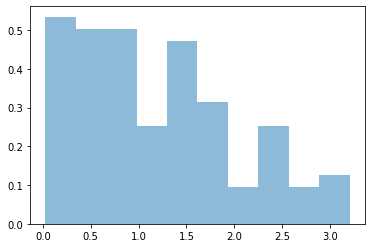

In [31]:
# plot severe histogram
fig, ax = plt.subplots(1, 1)

x_severe = np.array(severe_l)
print('Number of patients: {}, min: {}, max: {}'.format(len(x_severe),min(x_severe), max(x_severe)))
ax.hist(x_severe, density=True, histtype='stepfilled', alpha=0.5)

**Observations**:

    * Both datasets are from 0-> because I made Real values as absolute values
    * The normal distribution is beyond the binary range \[0,1\] due to the large STD=1
    * The skewed distribution is positive or right skewed and not negative or left skewed

## Define new parameters for each distribution to be within [0, 1] range

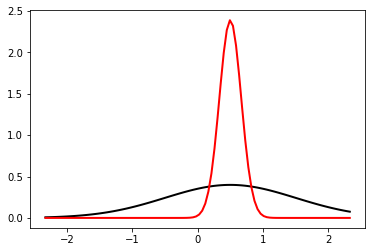

In [32]:
# Different normal distributions
# depending on std
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

# black
rv = norm(loc=0.5,scale=1)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# thin red
rv = norm(loc=0.5,scale=0.167)
ax.plot(x, rv.pdf(x), 'r-', lw=2, label='frozen pdf')

In [33]:
# interval containing 99.7% population in the distribution (loc=0.5, scale=0.16)
alpha = 0.997
norm.interval(alpha, loc=0.5, scale=0.167)

(0.004387766467922161, 0.9956122335320758)

In [34]:
# but, same distro and asking for the interval for 99.99%
# results in a range out of binary 0,1
alpha = 0.9999
norm.interval(alpha, loc=0.5, scale=0.167)

(-0.14972884503099115, 1.149728845030991)

(array([0.01656603, 0.11596221, 0.53839597, 1.84435133, 3.38775312,
        3.84331895, 2.50147052, 0.95806873, 0.27333949, 0.04969809]),
 array([0.11312331, 0.18703901, 0.26095472, 0.33487043, 0.40878613,
        0.48270184, 0.55661754, 0.63053325, 0.70444895, 0.77836466,
        0.85228037]),
 [<matplotlib.patches.Polygon at 0x7f1f3e011f40>])

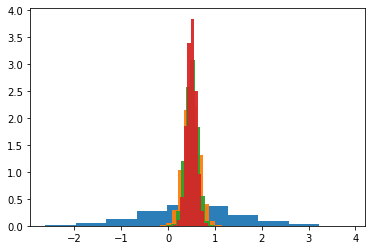

In [35]:
# Compare different distros vayring std for a conf(mean=0.5, size=4900)
fig, ax = plt.subplots(1, 1)

# blue
r = norm.rvs(loc=0.5,scale=1, size=4900)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.95)

# orange
r = norm.rvs(loc=0.5,scale=0.167, size=4900)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.95)

# green
r = norm.rvs(loc=0.5,scale=0.125, size=4900)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.95)

# red
r = norm.rvs(loc=0.5,scale=0.1, size=4900)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.95)

(-1.459963984540054, 2.459963984540054)
(-3.3905918864131204, 4.39059188641312)


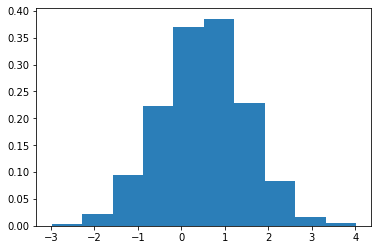

In [36]:
# compare % population intervals for each distro (mean, std) above
# 95%: [0.5-2*std, 0.5+2*std] = [-1.5, 2.5]
fig, ax = plt.subplots(1, 1)
r = norm.rvs(loc=0.5,scale=1, size=4900)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.95)

# interval where 95% is within 
alpha = 0.95
print(norm.interval(alpha, loc=0.5, scale=1))

# 99.99%: [0.5-4*std, 0.5+4*std] = [-3.5, 4.5]
# interval where 99.99% is within 
alpha = 0.9999
print(norm.interval(alpha, loc=0.5, scale=1))

(0.17268601458181093, 0.827313985418189)
(-0.14972884503099115, 1.149728845030991)


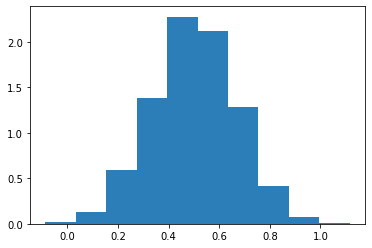

In [37]:
# 95%: [0.5-2*std, 0.5+2*std] = [0.166, 0.834]
fig, ax = plt.subplots(1, 1)
r = norm.rvs(loc=0.5,scale=0.167, size=4900)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.95)

# interval where 95% is within 
alpha = 0.95
print(norm.interval(alpha, loc=0.5, scale=0.167))

# 99.99%: [0.5-4*std, 0.5+4*std] = [-0.168, 1.168]
# interval where 99.99% is within 
alpha = 0.9999
print(norm.interval(alpha, loc=0.5, scale=0.167))

(0.25500450193249324, 0.7449954980675068)
(0.013676014198359954, 0.98632398580164)


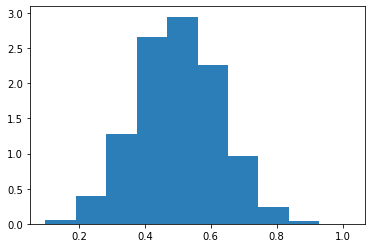

In [38]:
# 95%: [0.5-2*std, 0.5+2*std] = [0.25, 0.75]
fig, ax = plt.subplots(1, 1)
r = norm.rvs(loc=0.5,scale=0.125, size=4900)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.95)

# interval where 95% is within 
alpha = 0.95
print(norm.interval(alpha, loc=0.5, scale=0.125))

# 99.99%: [0.5-4*std, 0.5+4*std] = [0.01, 0.99]
# interval where 99.99% is within 
alpha = 0.9999
print(norm.interval(alpha, loc=0.5, scale=0.125))

(0.3040036015459946, 0.6959963984540054)
(0.11094081135868794, 0.8890591886413121)


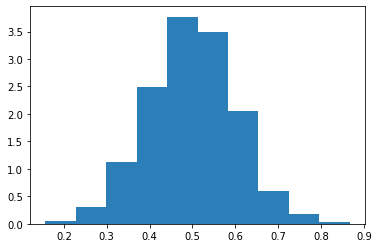

In [39]:
# 95%: [0.5-2*std, 0.5+2*std] = [0.3, 0.7]
fig, ax = plt.subplots(1, 1)
r = norm.rvs(loc=0.5,scale=0.1, size=4900)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.95)

# interval where 95% is within 
alpha = 0.95
print(norm.interval(alpha, loc=0.5, scale=0.1))

# 99.99%: [0.5-4*std, 0.5+4*std] = [0.1, 0.9]
# interval where 99.99% is within 
alpha = 0.9999
print(norm.interval(alpha, loc=0.5, scale=0.1))

### PARMETERS SELECTED NORMAL Distribution
#### range= [0, 1]
#### mean= 0.5, std= 0.125, size= 4900  ( loc=0.5, scale=0.125 ) 
###### interval for 95% pop.: [0.5-2*std, 0.5+2*std] = [0.25, 0.75] => elevated PGE2 level > 0.75 OR 2*std
###### interval for 99.99% pop.: [0.5-4*std, 0.5+4*std] = [0.01, 0.99]
---

0.9217905208226121 0.0017042252845405237 -0.1369487673116525 0.0617443154193264
0.9143175176769446 0.0012267604552648372 -0.45382556395938217 0.3050502729027925
0.9121530121696976 0.001067605512172942 -0.6670235701524082 0.5097701294494134
0.9112969138677673 0.001002071123840985 -0.7844267553823128 0.6327847548211796


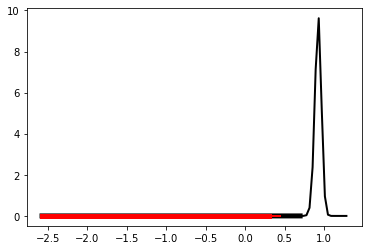

In [40]:
# Different skewed distributions
# dependent on a (skeweness)
# Skewed distribution: x= 0.95, std= 0.05 (x=loc, std=scale)
fig, ax = plt.subplots(1, 1)

# black
a=-1
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a,loc=0.95,scale=0.05)
mean, var, skew, kurt = skewnorm.stats(a,loc=0.95,scale=0.05, moments='mvsk')
print(mean, var, skew, kurt)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# bold black
a=-2
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a,loc=0.95,scale=0.05)
mean, var, skew, kurt = skewnorm.stats(a,loc=0.95,scale=0.05, moments='mvsk')
print(mean, var, skew, kurt)
ax.plot(x, rv.pdf(x), 'k-', lw=5, label='frozen pdf')

# red
a=-3
y = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a,loc=0.95,scale=0.05)
mean, var, skew, kurt = skewnorm.stats(a,loc=0.95,scale=0.05, moments='mvsk')
print(mean, var, skew, kurt)
ax.plot(y, rv.pdf(y), 'r-', lw=2, label='skewnorm pdf')

# bold red
a=-4
y = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a,loc=0.95,scale=0.05)
mean, var, skew, kurt = skewnorm.stats(a,loc=0.95,scale=0.05, moments='mvsk')
print(mean, var, skew, kurt)
ax.plot(y, rv.pdf(y), 'r-', lw=5, label='skewnorm pdf')

NB- a=-4 is the usual assymmetric shape found in documentation related to skewed distributions, since -1 is still to symmetric

In [41]:
# I want an interval [0,1], for a distro a= -4, mean= 0.95, size= 100 
# and std = ?
# mean between [0.75, 1] is 0.875 (thinking normal distro)
alpha = 0.9999
a=-4
print(skewnorm.interval(alpha, a, loc=0.875, scale=0.09))
print(skewnorm.mean(a, loc=0.875, scale=0.09))
print(skewnorm.std(a, loc=0.875, scale=0.09))

(0.5099935717006431, 0.9430291025048358)
0.8053344449619814
0.05697991261176864


NB:

    * min in the interval should be close to 0.75 (elevated level)
    * the peak is around 0.875
    * the 'real' skewed mean and std are a bit different than the input, which is correct

In [42]:
# what happens if we spread the data in (lower std)
alpha = 0.9999
a=-4
print(skewnorm.interval(alpha, a, loc=0.875, scale=0.03125))
print(skewnorm.mean(a, loc=0.875, scale=0.03125))
print(skewnorm.std(a, loc=0.875, scale=0.03125))

(0.748261656840501, 0.8986212161475124)
0.8508105711673546
0.019784691879086335


In [43]:
# let's change the mean to a more elevated PGE2 level = 0.95
alpha = 0.9999
a=-4
print(skewnorm.interval(alpha, a, loc=0.95, scale=0.05))
print(skewnorm.mean(a, loc=0.95, scale=0.05))
print(skewnorm.std(a, loc=0.95, scale=0.05))

(0.7472186509448017, 0.9877939458360199)
0.9112969138677673
0.03165550700653814


In [44]:
alpha = 0.95
a=-4
print(skewnorm.interval(alpha, a, loc=0.95, scale=0.05))

(0.837929863619754, 0.9593238085769582)


NB- now range is around [0.75, 1]

### PARMETERS SELECTED SKEWED Distribution
#### range= [0.75, 1]
#### shape (rel. to skewness)= -4, mean= 0.95, std= 0.05, size= 100  ( a=-4, loc=0.95, scale=0.05 ) 
###### interval for 95% pop.: [0.95-2*std, 0.95+2*std] = [0.85, 1.05] => elevated PGE2 level > 0.75 OR 2*std
###### interval for 99.99% pop.: [0.95-4*std, 0.95+4*std] = [0.75, 1.15]

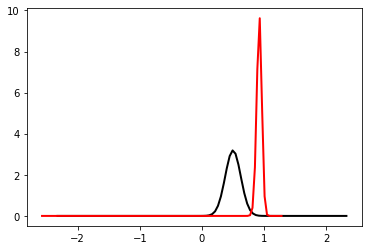

In [45]:
# Normal distribution: x= 0.5, std= 0.125 (x=loc, std=scale)
# Skewed distribution: x= 0.95, std= 0.05 (x=loc, std=scale)
fig, ax = plt.subplots(1, 1)

# Normal: black
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
rv = norm(loc=0.5,scale=0.125)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Skewed: thin red
a=-1
y = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a,loc=0.95,scale=0.05)
ax.plot(y, rv.pdf(y), 'r-', lw=2, label='skewnorm pdf')

## Sanity checking of s-data
### s-data v2

In [46]:
# display the distributions of s-data v2 
in_file = '../../out/exp2_random_sdata.csv'
sdata = pd.read_csv(in_file)
print(sdata.shape)
sdata.head()

(5000, 4)


,Patient_number,S,M,P
0,1,0,1,0.6816
1,2,0,1,0.5306
2,3,0,1,0.5195
3,4,0,1,0.5266
4,5,0,1,0.4414


Number of patients: 5000, min: 0.0566, max: 0.9683


(array([0.02851815, 0.19085225, 0.74366568, 1.86903587, 2.95272568,
        2.7509049 , 1.59482286, 0.53307009, 0.11626632, 0.18865855]),
 array([0.0566 , 0.14777, 0.23894, 0.33011, 0.42128, 0.51245, 0.60362,
        0.69479, 0.78596, 0.87713, 0.9683 ]),
 [<matplotlib.patches.Polygon at 0x7f1f3dd13340>])

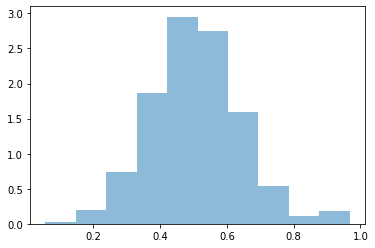

In [47]:
# plot histogram of PGE2 level values for all patients (5000)
fig, ax = plt.subplots(1, 1)

x = np.array(sdata.P)
print('Number of patients: {}, min: {}, max: {}'.format(len(x),min(x), max(x)))
ax.hist(x, density=True, histtype='stepfilled', alpha=0.5)

The number of not severe patients is 4900, and severe patients is 100
Number of patients: 4900, min: 0.0566, max: 0.9319
Number of patients: 100, min: 0.8436, max: 0.9683


(array([ 0.80192462,  6.41539695,  8.01924619,  8.01924619, 11.22694467,
         7.21732157, 16.840417  , 15.23656776,  3.20769848,  3.20769848]),
 array([0.8436 , 0.85607, 0.86854, 0.88101, 0.89348, 0.90595, 0.91842,
        0.93089, 0.94336, 0.95583, 0.9683 ]),
 [<matplotlib.patches.Polygon at 0x7f1f3dc74d30>])

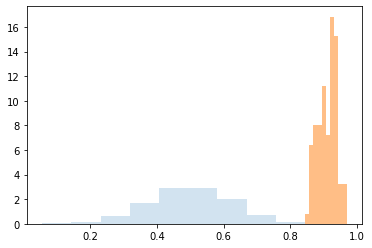

In [48]:
# plot histogram of PGE2 level values separately for 4900 not severe patients (S=0) and 100 severe (S=1) patients
fig, ax = plt.subplots(1, 1)

not_severe_l = list()
severe_l = list()
data = sdata.copy()
for idx, row in data.iterrows():
    S = int(row.S)
    P = row.P
    if S == 0:
        not_severe_l.append(P)
    else:
        severe_l.append(P)
        
print('The number of not severe patients is {}, and severe patients is {}'.format(len(not_severe_l), len(severe_l)))

# plot not severe histogram
x_not_severe = np.array(not_severe_l)
print('Number of patients: {}, min: {}, max: {}'.format(len(x_not_severe),min(x_not_severe), max(x_not_severe)))
ax.hist(x_not_severe, density=True, histtype='stepfilled', alpha=0.2)

# plot severe histogram
x_severe = np.array(severe_l)
print('Number of patients: {}, min: {}, max: {}'.format(len(x_severe),min(x_severe), max(x_severe)))
ax.hist(x_severe, density=True, histtype='stepfilled', alpha=0.5)

Number of patients: 100, min: 0.8436, max: 0.9683


(array([ 0.80192462,  6.41539695,  8.01924619,  8.01924619, 11.22694467,
         7.21732157, 16.840417  , 15.23656776,  3.20769848,  3.20769848]),
 array([0.8436 , 0.85607, 0.86854, 0.88101, 0.89348, 0.90595, 0.91842,
        0.93089, 0.94336, 0.95583, 0.9683 ]),
 [<matplotlib.patches.Polygon at 0x7f1f3dc56a30>])

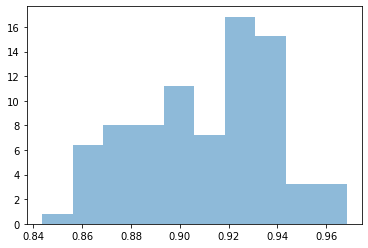

In [49]:
# plot severe histogram
fig, ax = plt.subplots(1, 1)

x_severe = np.array(severe_l)
print('Number of patients: {}, min: {}, max: {}'.format(len(x_severe),min(x_severe), max(x_severe)))
ax.hist(x_severe, density=True, histtype='stepfilled', alpha=0.5)